## Engineer New NLP Features

Author(s): Anthony, Sheffin

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import time
import nltk
import string
from nltk.corpus import stopwords
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
import re
from tqdm import tqdm
tqdm.pandas()
import collections
import en_core_web_sm
from nltk.tokenize import word_tokenize
stop = stopwords.words('english')
sp = spacy.load("en_core_web_sm")
import swifter

In [2]:
CWD = Path.cwd()
CWD

PosixPath('/Users/Sheffin/COMPSCI760')

In [3]:
CWD = Path.cwd()
DATA_DIR = CWD / "Datasets"
print(DATA_DIR)

/Users/Sheffin/COMPSCI760/Datasets


In [4]:
df_train = pd.read_parquet(DATA_DIR/"100K18F_train_text.parquet.snappy")
df_test = pd.read_parquet(DATA_DIR/"100K18F_test_text.parquet.snappy")
text_df = pd.concat([df_train, df_test], ignore_index=True)
text_df

,r_id,r_useful,r_text
0,2235679,1,"Like buns ? \nEat here . \nSeriously , this is..."
1,6902682,1,Sadly the best thing about this place was the ...
2,1590330,1,On my recent visit to New Orleans I met up wit...
3,6289537,1,My husband likes to come here. I really don't....
4,2112180,1,"Yes to everything!!! The ribs, the pulled pork..."
...,...,...,...
99995,2017374,1,Hands down the best PoBoys in Nola!! The delic...
99996,5277542,1,I stopped for a pre-flight lunch at the locati...
99997,5002546,1,"Enjoyed the food, service was good, I just wis..."
99998,2865497,1,I went to Booking.com and booked a suite at th...


In [5]:
text = text_df["r_text"]
text

0        Like buns ? \nEat here . \nSeriously , this is...
1        Sadly the best thing about this place was the ...
2        On my recent visit to New Orleans I met up wit...
3        My husband likes to come here. I really don't....
4        Yes to everything!!! The ribs, the pulled pork...
                               ...                        
99995    Hands down the best PoBoys in Nola!! The delic...
99996    I stopped for a pre-flight lunch at the locati...
99997    Enjoyed the food, service was good, I just wis...
99998    I went to Booking.com and booked a suite at th...
99999    The White Magnolia was the first and last brid...
Name: r_text, Length: 100000, dtype: object

### 1. Number of Words

In [6]:
def word_count(text):
    return len(text.split())

text_df['r_word_cnt'] = text_df["r_text"].apply(lambda x:word_count(x))
text_df.head()

,r_id,r_useful,r_text,r_word_cnt
0,2235679,1,"Like buns ? \nEat here . \nSeriously , this is...",71
1,6902682,1,Sadly the best thing about this place was the ...,206
2,1590330,1,On my recent visit to New Orleans I met up wit...,596
3,6289537,1,My husband likes to come here. I really don't....,43
4,2112180,1,"Yes to everything!!! The ribs, the pulled pork...",26


<AxesSubplot:xlabel='r_word_cnt', ylabel='Density'>

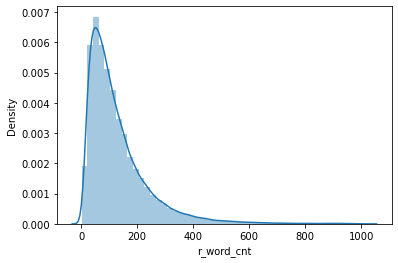

In [7]:
sns.distplot(text_df['r_word_cnt'])

### 2. Number of Characters

In [8]:
text_df['r_character_cnt'] = text_df['r_text'].str.len()
text_df.head()

,r_id,r_useful,r_text,r_word_cnt,r_character_cnt
0,2235679,1,"Like buns ? \nEat here . \nSeriously , this is...",71,393
1,6902682,1,Sadly the best thing about this place was the ...,206,1147
2,1590330,1,On my recent visit to New Orleans I met up wit...,596,3130
3,6289537,1,My husband likes to come here. I really don't....,43,226
4,2112180,1,"Yes to everything!!! The ribs, the pulled pork...",26,144


<AxesSubplot:xlabel='r_character_cnt', ylabel='Density'>

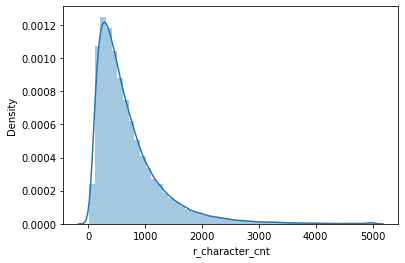

In [9]:
sns.distplot(text_df['r_character_cnt'])

### 3.  Number of sentences

In [10]:
def count_sent(text):
    return len(nltk.sent_tokenize(text))
text_df['r_sent_cnt'] = text_df["r_text"].swifter.apply(lambda x:count_sent(x))
text_df.head()

Pandas Apply:   0%|          | 0/100000 [00:00<?, ?it/s]

,r_id,r_useful,r_text,r_word_cnt,r_character_cnt,r_sent_cnt
0,2235679,1,"Like buns ? \nEat here . \nSeriously , this is...",71,393,7
1,6902682,1,Sadly the best thing about this place was the ...,206,1147,12
2,1590330,1,On my recent visit to New Orleans I met up wit...,596,3130,34
3,6289537,1,My husband likes to come here. I really don't....,43,226,8
4,2112180,1,"Yes to everything!!! The ribs, the pulled pork...",26,144,8


<AxesSubplot:xlabel='r_sent_cnt', ylabel='Density'>

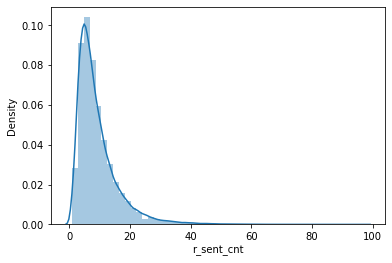

In [11]:
sns.distplot(text_df['r_sent_cnt'])

### 4. Count of unique words

In [12]:
def count_unique_words(text):
    return len(set(text.split()))
text_df['r_unique_word_cnt'] = text_df["r_text"].swifter.apply(lambda x:count_unique_words(x))
text_df.head()

Pandas Apply:   0%|          | 0/100000 [00:00<?, ?it/s]

,r_id,r_useful,r_text,r_word_cnt,r_character_cnt,r_sent_cnt,r_unique_word_cnt
0,2235679,1,"Like buns ? \nEat here . \nSeriously , this is...",71,393,7,61
1,6902682,1,Sadly the best thing about this place was the ...,206,1147,12,145
2,1590330,1,On my recent visit to New Orleans I met up wit...,596,3130,34,321
3,6289537,1,My husband likes to come here. I really don't....,43,226,8,38
4,2112180,1,"Yes to everything!!! The ribs, the pulled pork...",26,144,8,26


<AxesSubplot:xlabel='r_unique_word_cnt', ylabel='Density'>

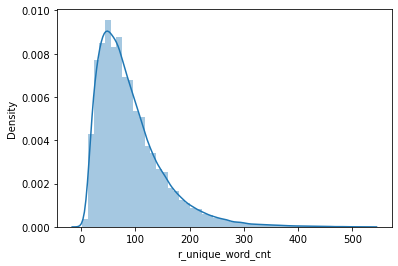

In [13]:
sns.distplot(text_df['r_unique_word_cnt'])

### 5. Count of stopwords

In [14]:
def count_stopwords(text):
    stop_words = set(stopwords.words('english'))  
    word_tokens = word_tokenize(text)
    stopwords_x = [w for w in word_tokens if w in stop_words]
    return len(stopwords_x)
text_df['r_stopword_cnt'] = text_df["r_text"].swifter.apply(lambda x:count_stopwords(x))
text_df.head()

Pandas Apply:   0%|          | 0/100000 [00:00<?, ?it/s]

,r_id,r_useful,r_text,r_word_cnt,r_character_cnt,r_sent_cnt,r_unique_word_cnt,r_stopword_cnt
0,2235679,1,"Like buns ? \nEat here . \nSeriously , this is...",71,393,7,61,24
1,6902682,1,Sadly the best thing about this place was the ...,206,1147,12,145,95
2,1590330,1,On my recent visit to New Orleans I met up wit...,596,3130,34,321,276
3,6289537,1,My husband likes to come here. I really don't....,43,226,8,38,18
4,2112180,1,"Yes to everything!!! The ribs, the pulled pork...",26,144,8,26,6


<AxesSubplot:xlabel='r_stopword_cnt', ylabel='Density'>

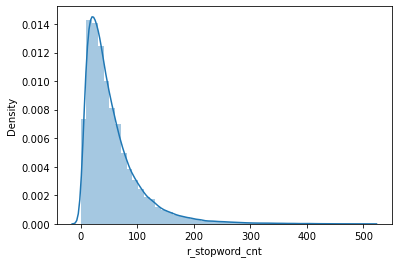

In [15]:
sns.distplot(text_df['r_stopword_cnt'])

### 6. Average word length

In [16]:
text_df['r_avg_wordlength'] = round(text_df['r_character_cnt']/text_df['r_word_cnt'],2)
text_df.head()

,r_id,r_useful,r_text,r_word_cnt,r_character_cnt,r_sent_cnt,r_unique_word_cnt,r_stopword_cnt,r_avg_wordlength
0,2235679,1,"Like buns ? \nEat here . \nSeriously , this is...",71,393,7,61,24,5.54
1,6902682,1,Sadly the best thing about this place was the ...,206,1147,12,145,95,5.57
2,1590330,1,On my recent visit to New Orleans I met up wit...,596,3130,34,321,276,5.25
3,6289537,1,My husband likes to come here. I really don't....,43,226,8,38,18,5.26
4,2112180,1,"Yes to everything!!! The ribs, the pulled pork...",26,144,8,26,6,5.54


<AxesSubplot:xlabel='r_avg_wordlength', ylabel='Density'>

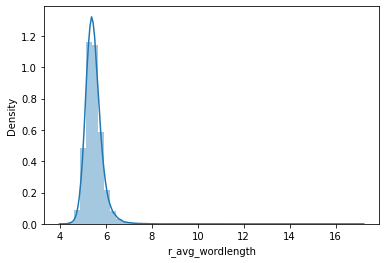

In [17]:
sns.distplot(text_df['r_avg_wordlength'])

### 7. Average sentence length

In [18]:
text_df['r_avg_sentlength'] = round(text_df['r_word_cnt']/text_df['r_sent_cnt'],2)
text_df.head()

,r_id,r_useful,r_text,r_word_cnt,r_character_cnt,r_sent_cnt,r_unique_word_cnt,r_stopword_cnt,r_avg_wordlength,r_avg_sentlength
0,2235679,1,"Like buns ? \nEat here . \nSeriously , this is...",71,393,7,61,24,5.54,10.14
1,6902682,1,Sadly the best thing about this place was the ...,206,1147,12,145,95,5.57,17.17
2,1590330,1,On my recent visit to New Orleans I met up wit...,596,3130,34,321,276,5.25,17.53
3,6289537,1,My husband likes to come here. I really don't....,43,226,8,38,18,5.26,5.38
4,2112180,1,"Yes to everything!!! The ribs, the pulled pork...",26,144,8,26,6,5.54,3.25


<AxesSubplot:xlabel='r_avg_sentlength', ylabel='Density'>

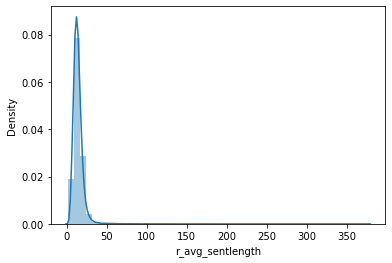

In [19]:
sns.distplot(text_df['r_avg_sentlength'])

### 8. Calculate unique words vs word count feature

In [20]:
text_df['r_unique/words'] = round(text_df['r_unique_word_cnt']/text_df['r_word_cnt'],2)
text_df.head()

,r_id,r_useful,r_text,r_word_cnt,r_character_cnt,r_sent_cnt,r_unique_word_cnt,r_stopword_cnt,r_avg_wordlength,r_avg_sentlength,r_unique/words
0,2235679,1,"Like buns ? \nEat here . \nSeriously , this is...",71,393,7,61,24,5.54,10.14,0.86
1,6902682,1,Sadly the best thing about this place was the ...,206,1147,12,145,95,5.57,17.17,0.70
2,1590330,1,On my recent visit to New Orleans I met up wit...,596,3130,34,321,276,5.25,17.53,0.54
3,6289537,1,My husband likes to come here. I really don't....,43,226,8,38,18,5.26,5.38,0.88
4,2112180,1,"Yes to everything!!! The ribs, the pulled pork...",26,144,8,26,6,5.54,3.25,1.00


<AxesSubplot:xlabel='r_unique/words', ylabel='Density'>

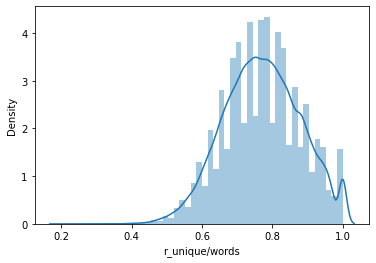

In [21]:
sns.distplot(text_df['r_unique/words'])

### 9. Calculate stopwords count vs words counts feature

In [22]:
text_df['r_stopwords/words'] = round(text_df['r_stopword_cnt']/text_df['r_word_cnt'],2)
text_df.head()

,r_id,r_useful,r_text,r_word_cnt,r_character_cnt,r_sent_cnt,r_unique_word_cnt,r_stopword_cnt,r_avg_wordlength,r_avg_sentlength,r_unique/words,r_stopwords/words
0,2235679,1,"Like buns ? \nEat here . \nSeriously , this is...",71,393,7,61,24,5.54,10.14,0.86,0.34
1,6902682,1,Sadly the best thing about this place was the ...,206,1147,12,145,95,5.57,17.17,0.70,0.46
2,1590330,1,On my recent visit to New Orleans I met up wit...,596,3130,34,321,276,5.25,17.53,0.54,0.46
3,6289537,1,My husband likes to come here. I really don't....,43,226,8,38,18,5.26,5.38,0.88,0.42
4,2112180,1,"Yes to everything!!! The ribs, the pulled pork...",26,144,8,26,6,5.54,3.25,1.00,0.23


<AxesSubplot:xlabel='r_stopwords/words', ylabel='Density'>

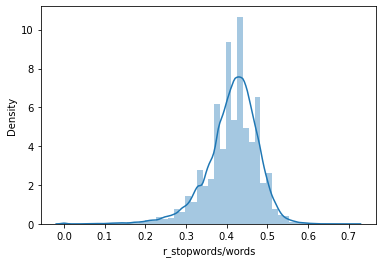

In [23]:
sns.distplot(text_df['r_stopwords/words'])

### 10. Number of digits

In [24]:
text_df['r_digit_cnt'] = text_df['r_text'].swifter.apply(lambda x: len([x for x in x.split() if x.isdigit()]))
text_df.head()

Pandas Apply:   0%|          | 0/100000 [00:00<?, ?it/s]

,r_id,r_useful,r_text,r_word_cnt,r_character_cnt,r_sent_cnt,r_unique_word_cnt,r_stopword_cnt,r_avg_wordlength,r_avg_sentlength,r_unique/words,r_stopwords/words,r_digit_cnt
0,2235679,1,"Like buns ? \nEat here . \nSeriously , this is...",71,393,7,61,24,5.54,10.14,0.86,0.34,0
1,6902682,1,Sadly the best thing about this place was the ...,206,1147,12,145,95,5.57,17.17,0.70,0.46,0
2,1590330,1,On my recent visit to New Orleans I met up wit...,596,3130,34,321,276,5.25,17.53,0.54,0.46,0
3,6289537,1,My husband likes to come here. I really don't....,43,226,8,38,18,5.26,5.38,0.88,0.42,0
4,2112180,1,"Yes to everything!!! The ribs, the pulled pork...",26,144,8,26,6,5.54,3.25,1.00,0.23,0


<AxesSubplot:xlabel='r_digit_cnt', ylabel='Density'>

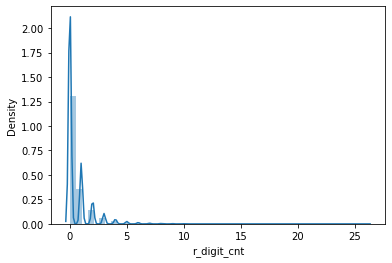

In [25]:
sns.distplot(text_df['r_digit_cnt'])

### 11. Number of Nouns

In [26]:
sen = sp(text[0])
for word in sen:
    print(word.text,  word.pos_)

Like ADP
buns NOUN
? PUNCT

 SPACE
Eat VERB
here ADV
. PUNCT

 SPACE
Seriously ADV
, PUNCT
this DET
is AUX
your PRON
trustworthy ADJ
Chinese ADJ
bakery NOUN
with ADP
the DET
assortments NOUN
of ADP
Baos PROPN
and CCONJ
sweet ADJ
cakes NOUN
. PUNCT
We PRON
always ADV
order VERB
cakes NOUN
here ADV
for ADP
our PRON
family NOUN
gatherings NOUN
. PUNCT
The DET
cakes NOUN
are AUX
Asian ADJ
- PUNCT
style NOUN
sponge NOUN
cakes NOUN
topped VERB
with ADP
an DET
assortment NOUN
of ADP
fruits NOUN
. PUNCT
You PRON
can AUX
have VERB
plan NOUN
whipped VERB
filling NOUN
or CCONJ
opt VERB
for ADP
more ADV
interesting ADJ
tastes NOUN
like ADP
Duran PROPN
or CCONJ
taro NOUN
. PUNCT
Overall ADV
it PRON
's AUX
a DET
quick ADJ
stop NOUN
for ADP
good ADJ
quality NOUN
buns NOUN
. PUNCT


In [27]:
def count_noun(x):
    res = [token.pos_ for token in sp(x)]
    return collections.Counter(res)['NOUN']

In [28]:
text_df['r_noun_cnt'] = text_df['r_text'].swifter.apply(count_noun)
text_df.head()

Pandas Apply:   0%|          | 0/100000 [00:00<?, ?it/s]

,r_id,r_useful,r_text,r_word_cnt,r_character_cnt,r_sent_cnt,r_unique_word_cnt,r_stopword_cnt,r_avg_wordlength,r_avg_sentlength,r_unique/words,r_stopwords/words,r_digit_cnt,r_noun_cnt
0,2235679,1,"Like buns ? \nEat here . \nSeriously , this is...",71,393,7,61,24,5.54,10.14,0.86,0.34,0,20
1,6902682,1,Sadly the best thing about this place was the ...,206,1147,12,145,95,5.57,17.17,0.70,0.46,0,37
2,1590330,1,On my recent visit to New Orleans I met up wit...,596,3130,34,321,276,5.25,17.53,0.54,0.46,0,118
3,6289537,1,My husband likes to come here. I really don't....,43,226,8,38,18,5.26,5.38,0.88,0.42,0,7
4,2112180,1,"Yes to everything!!! The ribs, the pulled pork...",26,144,8,26,6,5.54,3.25,1.00,0.23,0,7


<AxesSubplot:xlabel='r_noun_cnt', ylabel='Density'>

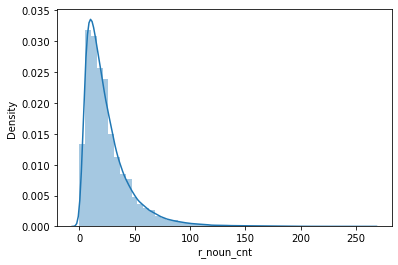

In [29]:
sns.distplot(text_df['r_noun_cnt'])

### 12. Number of Adjectives

In [30]:
def count_Adj(x):
    res = [token.pos_ for token in sp(x)]
    return collections.Counter(res)['ADJ']

In [31]:
text_df['r_Adj_cnt'] = text_df['r_text'].swifter.apply(count_Adj)
text_df.head()

Pandas Apply:   0%|          | 0/100000 [00:00<?, ?it/s]

,r_id,r_useful,r_text,r_word_cnt,r_character_cnt,r_sent_cnt,r_unique_word_cnt,r_stopword_cnt,r_avg_wordlength,r_avg_sentlength,r_unique/words,r_stopwords/words,r_digit_cnt,r_noun_cnt,r_Adj_cnt
0,2235679,1,"Like buns ? \nEat here . \nSeriously , this is...",71,393,7,61,24,5.54,10.14,0.86,0.34,0,20,7
1,6902682,1,Sadly the best thing about this place was the ...,206,1147,12,145,95,5.57,17.17,0.70,0.46,0,37,25
2,1590330,1,On my recent visit to New Orleans I met up wit...,596,3130,34,321,276,5.25,17.53,0.54,0.46,0,118,38
3,6289537,1,My husband likes to come here. I really don't....,43,226,8,38,18,5.26,5.38,0.88,0.42,0,7,1
4,2112180,1,"Yes to everything!!! The ribs, the pulled pork...",26,144,8,26,6,5.54,3.25,1.00,0.23,0,7,3


<AxesSubplot:xlabel='r_Adj_cnt', ylabel='Density'>

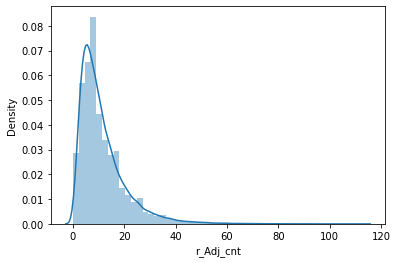

In [32]:
sns.distplot(text_df['r_Adj_cnt'])

### 13. Number of Verbs

In [33]:
def count_Adv(x):
    res = [token.pos_ for token in sp(x)]
    return collections.Counter(res)['ADV']

In [34]:
text_df['r_Adv_cnt'] = text_df['r_text'].swifter.apply(count_Adv)
text_df.head()

Pandas Apply:   0%|          | 0/100000 [00:00<?, ?it/s]

,r_id,r_useful,r_text,r_word_cnt,r_character_cnt,r_sent_cnt,r_unique_word_cnt,r_stopword_cnt,r_avg_wordlength,r_avg_sentlength,r_unique/words,r_stopwords/words,r_digit_cnt,r_noun_cnt,r_Adj_cnt,r_Adv_cnt
0,2235679,1,"Like buns ? \nEat here . \nSeriously , this is...",71,393,7,61,24,5.54,10.14,0.86,0.34,0,20,7,6
1,6902682,1,Sadly the best thing about this place was the ...,206,1147,12,145,95,5.57,17.17,0.70,0.46,0,37,25,20
2,1590330,1,On my recent visit to New Orleans I met up wit...,596,3130,34,321,276,5.25,17.53,0.54,0.46,0,118,38,36
3,6289537,1,My husband likes to come here. I really don't....,43,226,8,38,18,5.26,5.38,0.88,0.42,0,7,1,6
4,2112180,1,"Yes to everything!!! The ribs, the pulled pork...",26,144,8,26,6,5.54,3.25,1.00,0.23,0,7,3,1


<AxesSubplot:xlabel='r_Adv_cnt', ylabel='Density'>

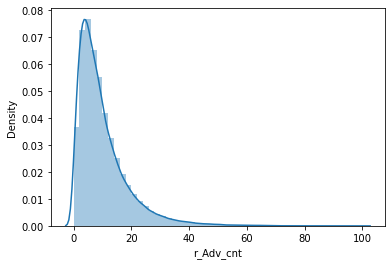

In [35]:
sns.distplot(text_df['r_Adv_cnt'])

### 14. Number of capital words

In [36]:
def count_capital_words(text):
    return sum(map(str.isupper,text.split()))
text_df['r_capital_word_cnt'] = text_df["r_text"].swifter.apply(lambda x:count_capital_words(x))
text_df.head()

Pandas Apply:   0%|          | 0/100000 [00:00<?, ?it/s]

,r_id,r_useful,r_text,r_word_cnt,r_character_cnt,r_sent_cnt,r_unique_word_cnt,r_stopword_cnt,r_avg_wordlength,r_avg_sentlength,r_unique/words,r_stopwords/words,r_digit_cnt,r_noun_cnt,r_Adj_cnt,r_Adv_cnt,r_capital_word_cnt
0,2235679,1,"Like buns ? \nEat here . \nSeriously , this is...",71,393,7,61,24,5.54,10.14,0.86,0.34,0,20,7,6,0
1,6902682,1,Sadly the best thing about this place was the ...,206,1147,12,145,95,5.57,17.17,0.70,0.46,0,37,25,20,1
2,1590330,1,On my recent visit to New Orleans I met up wit...,596,3130,34,321,276,5.25,17.53,0.54,0.46,0,118,38,36,10
3,6289537,1,My husband likes to come here. I really don't....,43,226,8,38,18,5.26,5.38,0.88,0.42,0,7,1,6,2
4,2112180,1,"Yes to everything!!! The ribs, the pulled pork...",26,144,8,26,6,5.54,3.25,1.00,0.23,0,7,3,1,1


### 15. Number of words in quotes

In [37]:
def count_words_in_quotes(text):
    x = re.findall("'.'|\".\"", text)
    count=0
    if x is None:
        return 0
    else:
        for i in x:
            t=i[1:-1]
            count+=word_count(t)
        return count
text_df['r_quoted_word_cnt'] = text_df["r_text"].swifter.apply(lambda x:count_words_in_quotes(x))
text_df.head()

Pandas Apply:   0%|          | 0/100000 [00:00<?, ?it/s]

,r_id,r_useful,r_text,r_word_cnt,r_character_cnt,r_sent_cnt,r_unique_word_cnt,r_stopword_cnt,r_avg_wordlength,r_avg_sentlength,r_unique/words,r_stopwords/words,r_digit_cnt,r_noun_cnt,r_Adj_cnt,r_Adv_cnt,r_capital_word_cnt,r_quoted_word_cnt
0,2235679,1,"Like buns ? \nEat here . \nSeriously , this is...",71,393,7,61,24,5.54,10.14,0.86,0.34,0,20,7,6,0,0
1,6902682,1,Sadly the best thing about this place was the ...,206,1147,12,145,95,5.57,17.17,0.70,0.46,0,37,25,20,1,0
2,1590330,1,On my recent visit to New Orleans I met up wit...,596,3130,34,321,276,5.25,17.53,0.54,0.46,0,118,38,36,10,0
3,6289537,1,My husband likes to come here. I really don't....,43,226,8,38,18,5.26,5.38,0.88,0.42,0,7,1,6,2,0
4,2112180,1,"Yes to everything!!! The ribs, the pulled pork...",26,144,8,26,6,5.54,3.25,1.00,0.23,0,7,3,1,1,0


<AxesSubplot:xlabel='r_quoted_word_cnt', ylabel='Density'>

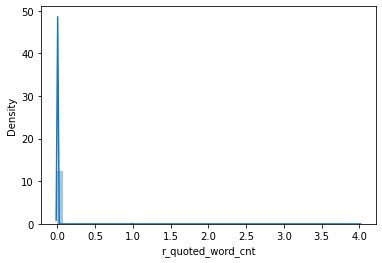

In [38]:
sns.distplot(text_df['r_quoted_word_cnt'])

### 16. Number of hashtags

In [39]:
def count_htags(text):
    x = re.findall(r'(#w[A-Za-z0-9]*)', text)
    return len(x) 
text_df['r_hashtag_cnt'] = text_df["r_text"].swifter.apply(lambda x:count_htags(x))
text_df.head()

Pandas Apply:   0%|          | 0/100000 [00:00<?, ?it/s]

,r_id,r_useful,r_text,r_word_cnt,r_character_cnt,r_sent_cnt,r_unique_word_cnt,r_stopword_cnt,r_avg_wordlength,r_avg_sentlength,r_unique/words,r_stopwords/words,r_digit_cnt,r_noun_cnt,r_Adj_cnt,r_Adv_cnt,r_capital_word_cnt,r_quoted_word_cnt,r_hashtag_cnt
0,2235679,1,"Like buns ? \nEat here . \nSeriously , this is...",71,393,7,61,24,5.54,10.14,0.86,0.34,0,20,7,6,0,0,0
1,6902682,1,Sadly the best thing about this place was the ...,206,1147,12,145,95,5.57,17.17,0.70,0.46,0,37,25,20,1,0,0
2,1590330,1,On my recent visit to New Orleans I met up wit...,596,3130,34,321,276,5.25,17.53,0.54,0.46,0,118,38,36,10,0,0
3,6289537,1,My husband likes to come here. I really don't....,43,226,8,38,18,5.26,5.38,0.88,0.42,0,7,1,6,2,0,0
4,2112180,1,"Yes to everything!!! The ribs, the pulled pork...",26,144,8,26,6,5.54,3.25,1.00,0.23,0,7,3,1,1,0,0


<AxesSubplot:xlabel='r_hashtag_cnt', ylabel='Density'>

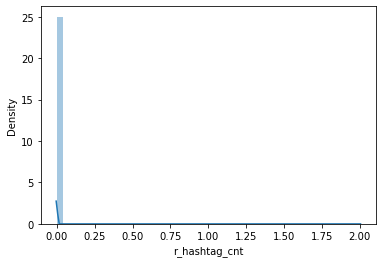

In [40]:
sns.distplot(text_df['r_hashtag_cnt'])

### 17. Number of Exclamations

In [41]:
text_df['r_exclam_cnt'] = text_df['r_text'].swifter.apply(lambda x: x.count('!'))
text_df.head()

,r_id,r_useful,r_text,r_word_cnt,r_character_cnt,r_sent_cnt,r_unique_word_cnt,r_stopword_cnt,r_avg_wordlength,r_avg_sentlength,r_unique/words,r_stopwords/words,r_digit_cnt,r_noun_cnt,r_Adj_cnt,r_Adv_cnt,r_capital_word_cnt,r_quoted_word_cnt,r_hashtag_cnt,r_exclam_cnt
0,2235679,1,"Like buns ? \nEat here . \nSeriously , this is...",71,393,7,61,24,5.54,10.14,0.86,0.34,0,20,7,6,0,0,0,0
1,6902682,1,Sadly the best thing about this place was the ...,206,1147,12,145,95,5.57,17.17,0.70,0.46,0,37,25,20,1,0,0,0
2,1590330,1,On my recent visit to New Orleans I met up wit...,596,3130,34,321,276,5.25,17.53,0.54,0.46,0,118,38,36,10,0,0,0
3,6289537,1,My husband likes to come here. I really don't....,43,226,8,38,18,5.26,5.38,0.88,0.42,0,7,1,6,2,0,0,0
4,2112180,1,"Yes to everything!!! The ribs, the pulled pork...",26,144,8,26,6,5.54,3.25,1.00,0.23,0,7,3,1,1,0,0,3


<AxesSubplot:xlabel='r_exclam_cnt', ylabel='Density'>

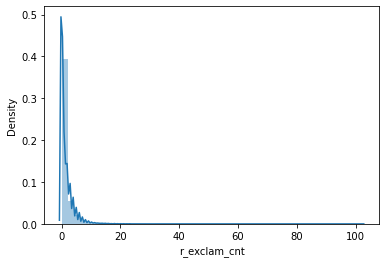

In [42]:
sns.distplot(text_df['r_exclam_cnt'])

## Export file

In [43]:
File = DATA_DIR / "newnlp.parquet.snappy"
text_df.to_parquet(File)